# Resolução de dois exercícios de fixação da monitoria de ICD 25/01/2022

## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 -  Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

Este problema pode modelado considerando uma variável aleatória $X \sim Bernoulli(p)$ em que $X=1$ representa o evento 'sair cara' com probabilidade $p$ e $X=0$ representa o evento 'sair coroa' com probabilidade $1-p$. Assim, vetor
$$Px = [p_X(X=0), p_X(X=1)] =[1-p, p]$$
representa as probabilidades exatas de sair coroa e sair cara respectivamente.

Para $p=0,\!5$, temos 

$$Px = [1-0,\!5; 0,\!5] = [0,\!5; 0,\!5]$$.

Por outro lado, temos que a entropia é calculada pela expressão

$$S = -\sum(p_k * \log_2(p_k))$$

quando definimos a base do logaritmo iguaal a 2.\\

Note que o cálculo da entropia não depende dos valores da variável aleatória $X$. Depende apenas das probabilidades associadas a cada valor que $X$ pode assumir. Assim,

$$S = -\sum(p_k * \log_b(p_k)) = -p_0 * \log_b(p_0) - p_1 * \log_b(p_1)= -2 * 0,\!5 * \log(0,\!5) = 1$$.\\

Para montar o gráfico da entropia em função do valor $p$, precisamos repetir este cálculo para diversos valores de $p \in [0,1]$.

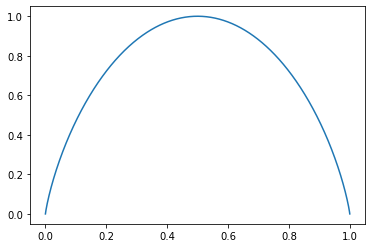

In [1]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

E = []
Pb = np.linspace(0, 1, 1000)

for p in Pb:
    H = entropy([1-p, p], base = 2)
    E.append(H)

plt.plot(Pb, E)

Uma abordagem alternativa é fazer uso da distribuição empírica ao invés da distribuição teórica que usamos acima. A distribuição empírica é obtida gerando valores de uma amostra de tamanho $N$ (quanto maior o $N$, melhor) e calculando a frequência relativa de cada valor. Um exemplo para $p =0,\!8$:

In [2]:
from scipy.stats import bernoulli
p = 0.8
N = 100
amostra = bernoulli.rvs(p, size=N)
amostra

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

Vamos tranformar a função que o Prof. Franscisco criou para contar frequência em uma função que fornece um vetor de frequência relativa, ou seja, que contém as probabilidade de cada valor calculadas de forma empírica.

In [3]:
def freq_rel(amostra):
    N = len(amostra)
    values = np.sort(np.unique(amostra)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
    # vamos calcular a frequência de cada valor presente na lista
    freq = np.zeros(len(values)) # armazena as frequencias
    ind = 0 # indice do vetor de frequências
    for i in values: # para os valores diferentes
        counter = 0 # conta as ocorrências
        for j in range(0,len(amostra)):
            if(amostra[j] == i):
                counter = counter + 1
        freq[ind] = counter / N
        ind = ind + 1
    return freq

In [4]:
# Testando a função freq_rel
freq_rel(amostra)

array([0.18, 0.82])

Calculemos o gráfico pedido para uma amostra de tamanho pequeno (N = 100) neste caso. 

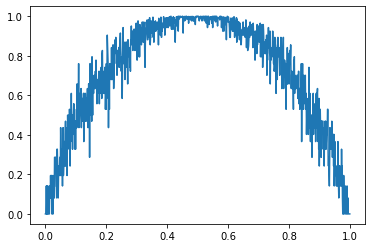

In [5]:
N = 100 # Tamanho da amostra
E = []
Pb = np.linspace(0, 1, 1000)
for p in Pb:
    amostra = bernoulli.rvs(p, size = N)
    H = entropy(freq_rel(amostra), base = 2)
    E.append(H)

plt.plot(Pb, E)

Veja que para amostras de tamanho $N = 100$ observamos muito ruído no gráfico. Isso se deve às flutuações amostrais de cada sorteio. À medida em que o tamanho da amostra aumenta, ganhamos um gráfico com menos ruído. Para $N=1000$, temos

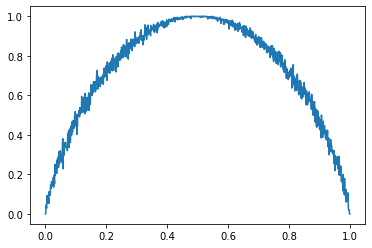

In [6]:
N = 1000 # Tamanho da amostra
E = []
Pb = np.linspace(0, 1, 1000)
for p in Pb:
    amostra = bernoulli.rvs(p, size = N)
    H = entropy(freq_rel(amostra), base = 2)
    E.append(H)

plt.plot(Pb, E)

Por fim, para $N = 10^5$, temos 

In [7]:
# Obs.: Demora menos de 1 minuto para rodar

N = 10**5 # Tamanho da amostra
E = []
Pb = np.linspace(0, 1, 1000)
for p in Pb:
    amostra = bernoulli.rvs(p, size = N)
    H = entropy(freq_rel(amostra), base = 2)
    E.append(H)

plt.plot(Pb, E)

Assim, terminamos o exercício mostrando duas formas de fazê-lo para o caso de variáveis aleatórias discretas.

2 - Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

In [ ]:
from  scipy.stats import poisson
N = 10000
mu = 2
r = poisson.rvs(mu, size=N)

In [ ]:
np.mean(r)

1.9963

In [ ]:
def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

In [ ]:
np.var(r, ddof=1) # Versão amostral  com N menos um graus de liberdade

2.0002863386338636

In [ ]:
np.var(r, ddof=0) # Versão populacional com N graus de liberdade

2.0000863100000004

In [ ]:
variancia(r)

2.000286338633917

Podemos notar que, de fato, o valor da variância se encontra próximo ao da média no caso da distribuição Poisson. Caso aumentemos o valor de $N$, por exemplo, $N=10^6$, temos

In [ ]:
N = 10**6
mu = 2
r = poisson.rvs(mu, size=N)

In [ ]:
media, varian  = np.mean(r) , np.var(r, ddof=1)
[media, varian]

[2.001904, 2.000880375664375]